In [1]:
#conda install -c conda-forge scikit-plot

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 크롤링 start_date, end_date
start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : 2017-01-01
YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : 2021-01-01


In [115]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [116]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)

# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [117]:
# SOX 지수
SOX = yf.download("^SOX", start=start_date, end=end_date)
SOX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOX = SOX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [118]:
#model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
model_samsung['MSCI_KR'] = MSCI_KR
model_samsung['SOX'] = SOX
#model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['TREASURY_10Y']=treasury_10y_
#model_samsung['TREASURY_30Y']=treasury_30y_

In [119]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [120]:
df = model_samsung

In [121]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 910 entries, 2017-02-21 to 2020-12-30
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          910 non-null    int32  
 1   High          910 non-null    int32  
 2   Low           910 non-null    int32  
 3   Close         910 non-null    int32  
 4   Volume        910 non-null    int32  
 5   macd          910 non-null    float64
 6   macdsignal9   910 non-null    float64
 7   macdhist      910 non-null    float64
 8   SNP500        910 non-null    float64
 9   RUSSELL2000   910 non-null    float64
 10  NASDAQ        910 non-null    float64
 11  MSCI_KR       910 non-null    int64  
 12  SOX           910 non-null    float64
 13  TREASURY_10Y  910 non-null    float64
dtypes: float64(8), int32(5), int64(1)
memory usage: 88.9 KB


In [123]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df)
output = min_max_scaler.transform(df)
output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
print(output.head())

                Open      High       Low     Close    Volume      macd  \
2017-02-21  0.487848  0.486593  0.491304  0.034214  0.003327  0.591511   
2017-02-22  0.493671  0.483887  0.498465  0.042480  0.002690  0.598004   
2017-02-23  0.493924  0.485117  0.498977  0.039724  0.003218  0.601011   
2017-02-24  0.493165  0.480935  0.486701  0.017681  0.002929  0.591482   
2017-02-27  0.481266  0.469127  0.482097  0.014007  0.002846  0.581545   

            macdsignal9  macdhist    SNP500  RUSSELL2000    NASDAQ   MSCI_KR  \
2017-02-21     0.607806  0.522061  0.085436     0.412603  0.010150  0.213913   
2017-02-22     0.602296  0.562403  0.083727     0.406225  0.009401  0.212315   
2017-02-23     0.598610  0.584525  0.084388     0.397130  0.005866  0.218068   
2017-02-24     0.593374  0.565727  0.086745     0.397031  0.007245  0.200916   
2017-02-27     0.586800  0.549499  0.088354     0.410270  0.009580  0.194311   

                 SOX  TREASURY_10Y  
2017-02-21  0.016393      0.704936  


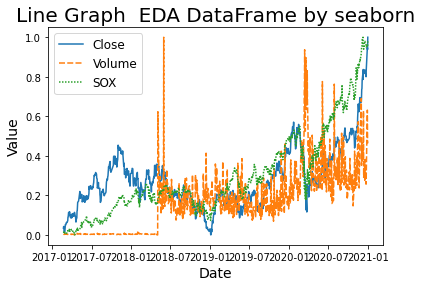

In [124]:
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'Volume', 'SOX']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

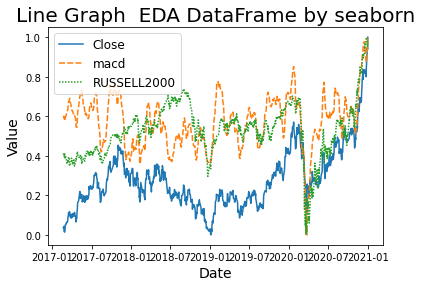

In [131]:
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'macd', 'RUSSELL2000']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [132]:
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [133]:
# samsung 모델
lst_label = ['a']
for i in range(len(model_samsung)-1):
    if model_samsung.iloc[i+1]['Close'] == model_samsung.iloc[i]['Close']:
        lst_label.append(2) # 전일 주가 = 당일 주가 : 2
    elif model_samsung.iloc[i+1]['Close'] > model_samsung.iloc[i]['Close']:
        lst_label.append(0) # 전일 주가 < 당일 주가 : 0
    else:
        lst_label.append(1) # 전일 주가 > 당일 주가 : 1
model_samsung['Labeling'] = lst_label
model_samsung = model_samsung.drop(model_samsung[model_samsung['Labeling'] == 'a'].index) # 첫 행 삭제
model_samsung = model_samsung.drop(model_samsung[model_samsung['Labeling'] == 2].index) # 전일 주가 = 당일 주가인 행 삭제
model_samsung['Labeling'] = model_samsung['Labeling'].astype("category")
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [134]:
# 데이터 정규화하기 
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(model_samsung), columns=model_samsung.columns, index=model_samsung.index)

# 값 넣기
df_scaled.drop(['Open', 'High', 'Low', 'Volume', 'Labeling'], axis=1, inplace=True)
df_scaled['Labeling'] = model_samsung['Labeling']
df_scaled = df_scaled[1:]
df_scaled

,Close,macd,macdsignal9,macdhist,SNP500,RUSSELL2000,NASDAQ,MSCI_KR,SOX,TREASURY_10Y,Labeling
날짜,,,,,,,,,,,
2017-02-23,-1.599416,0.230985,0.359041,-0.314740,-1.486791,-0.934600,-1.356424,-1.424400,-1.320482,0.424903,1
2017-02-24,-1.747533,0.158902,0.323086,-0.439438,-1.475883,-0.935328,-1.350301,-1.556328,-1.321554,0.335891,1
2017-02-27,-1.772219,0.083729,0.277945,-0.547088,-1.468436,-0.837344,-1.339935,-1.607132,-1.299219,0.401082,1
2017-02-28,-1.713590,0.054498,0.235464,-0.515917,-1.487316,-0.992443,-1.362716,-1.526828,-1.331674,0.387292,0
2017-03-02,-1.516099,0.140774,0.220275,-0.196087,-1.430832,-0.926950,-1.340360,-1.486676,-1.319335,0.551525,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,3.510641,2.347503,2.936102,-1.110330,2.602632,3.401931,3.000146,3.434811,3.091802,-1.418021,1
2020-12-23,3.757503,2.288489,2.848682,-1.042544,2.611130,3.527380,2.977146,3.664251,3.040852,-1.371634,0
2020-12-28,4.498091,2.813667,2.883918,0.530210,2.751260,3.448337,3.057318,3.967440,3.092625,-1.399215,0


In [135]:
df_scaled = df_scaled.dropna()
y_var = df_scaled['Labeling']
x_var = df_scaled.drop(['Labeling'], axis=1)

In [136]:
x_var

,Close,macd,macdsignal9,macdhist,SNP500,RUSSELL2000,NASDAQ,MSCI_KR,SOX,TREASURY_10Y
날짜,,,,,,,,,,
2017-02-23,-1.599416,0.230985,0.359041,-0.314740,-1.486791,-0.934600,-1.356424,-1.424400,-1.320482,0.424903
2017-02-24,-1.747533,0.158902,0.323086,-0.439438,-1.475883,-0.935328,-1.350301,-1.556328,-1.321554,0.335891
2017-02-27,-1.772219,0.083729,0.277945,-0.547088,-1.468436,-0.837344,-1.339935,-1.607132,-1.299219,0.401082
2017-02-28,-1.713590,0.054498,0.235464,-0.515917,-1.487316,-0.992443,-1.362716,-1.526828,-1.331674,0.387292
2017-03-02,-1.516099,0.140774,0.220275,-0.196087,-1.430832,-0.926950,-1.340360,-1.486676,-1.319335,0.551525
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,3.510641,2.347503,2.936102,-1.110330,2.602632,3.401931,3.000146,3.434811,3.091802,-1.418021
2020-12-23,3.757503,2.288489,2.848682,-1.042544,2.611130,3.527380,2.977146,3.664251,3.040852,-1.371634
2020-12-28,4.498091,2.813667,2.883918,0.530210,2.751260,3.448337,3.057318,3.967440,3.092625,-1.399215


In [137]:
y_var

날짜
2017-02-23    1
2017-02-24    1
2017-02-27    1
2017-02-28    0
2017-03-02    0
             ..
2020-12-22    1
2020-12-23    0
2020-12-28    0
2020-12-29    1
2020-12-30    0
Name: Labeling, Length: 868, dtype: category
Categories (2, int64): [0, 1]

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
#훈련 세트와 테스트 세트를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(x_var, 
                                                    y_var, 
                                                    test_size=0.3, 
                                                    shuffle=False, 
                                                    random_state=3)

#훈련 세트와 테스트 세트에 포함된 양성 샘플(up) 비율을 확인한다.
train_count = y_train.count()
test_count = y_test.count()

print('train set label ratio')
print(y_train.value_counts()/train_count)
print('test set label ratio')
print(y_test.value_counts()/test_count)

train set label ratio
0    0.52883
1    0.47117
Name: Labeling, dtype: float64
test set label ratio
0    0.544061
1    0.455939
Name: Labeling, dtype: float64


In [140]:
def get_confusion_matrix(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('confusion matrix')
    print('accuracy:{0:.4f},precision:{1:.4f},recall:{2:.4f},F1:{3:.4f},ROC AUC score:{4:.4f}'.format(accuracy, precision, recall, f1,roc_score))

In [141]:
xgb_dis = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_dis.fit(X_train, y_train)
xgb_pred = xgb_dis.predict(X_test)

[22:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\song\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [142]:
xgb_dis

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
print(xgb_dis.score(X_train, y_train))


0.9917627677100495


In [144]:
get_confusion_matrix(y_test, xgb_pred)

confusion matrix
accuracy:0.5479,precision:1.0000,recall:0.0084,F1:0.0167,ROC AUC score:0.5042


In [145]:
n_estimators = range(10,20,5)

params = {
    'bootstrap': [True],
    'n_estimators':n_estimators,
    'max_depth':[2,3],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 4, 6, 8],
    'max_features':[2]
}

In [146]:
my_cv = TimeSeriesSplit(n_splits=5).split(X_train)

In [147]:
clf = GridSearchCV(RandomForestClassifier(), params, cv=my_cv, n_jobs=-1)
clf.fit(X_train, y_train)


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x000002681A3B80B0>,
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 3],
                         'max_features': [2], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': range(10, 20, 5)})

In [148]:
print('best parameter:\n', clf.best_params_)
print('best prediction:{0:.4f}'.format(clf.best_score_))

best parameter:
 {'bootstrap': True, 'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10}
best prediction:0.5505


In [149]:
pred_con = clf.predict(X_test)
accuracy_con = accuracy_score(y_test, pred_con)
print('accuracy:{0:.4f}'.format(accuracy_con))
get_confusion_matrix(y_test, pred_con)

accuracy:0.5364
confusion matrix
accuracy:0.5364,precision:0.4800,recall:0.2017,F1:0.2840,ROC AUC score:0.5093
